# EXERCICES D'APPLICATION SUR LES DATAFRAMES

## OBJECTIFS
Ces exercices ont pour but de nous apprendre à :
- faire des requêtes sur des dataframes et de les interpréter
- tracer des diagrammes en fonction de la requête demandée 

## TABLE DE MATIERES
1- Import library  
2- Import data  
3- Function  
        3.1 def extraire_hostname_string  
        3.2 def extraire_hostname  
4- Compter le nombre de CP par ville  
5- Revenu par ville et par genre (min, max, median, moyenne, 3ieme quartille)  
        5.1 Jointure des dataframes prets et clients     
        5.2 Revenu par ville et par genre (min, max, median, moyenne)    
        5.3 Revenu par ville et par genre (3ieme quartille)    
6- Les histogrammes  
        6.1 Histogramme median des taux par ville   
        6.2 Histogramme median des taux par genre   
        6.3 Histogramme median des taux par genre et type  
        6.4 Histogramme median des taux par genre et ville   
7- boxplot des revenus par ville   
8- Table qui contient les clients et leurs emails avec les revenus supérieurs au revenu median   
9- Code postal (CP) où on passe moins de temps   
10- Les 5 premiers CP avec le plus haut taux    
11- Les 5 premiers CP avec le plus haut revenu   
Application: Chiffre d'affaire réalisé par agence   

## 1- Import library 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mailbox

## 2- Import data

In [3]:
data = pd.read_csv("clients.csv")
display(data)

,identifiant,email,nom,genre
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,GuyMarois@fleckens.hu,Guy Marois,M
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M
3,3,RussellDurand@armyspy.com,Russell Durand,M
4,4,AlexisRiel@rhyta.com,Alexis Riel,M
...,...,...,...,...
223,223,ClaudeDandonneau@jourrapide.com,Claude Dandonneau,F
224,224,ApollineMichaud@superrito.com,Apolline Michaud,F
225,225,PascalineBeaudry@rhyta.com,Pascaline Beaudry,F
226,226,FleurCaouette@jourrapide.com,Fleur Caouette,F


In [4]:
prets = pd.read_csv("prets.txt")
display(prets.head())

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


In [5]:
prets.shape[0]

244

## 3- Function
Calcul des fonctions:
- extraire_hostname_string : qui prend en entrée un email et retourne son hostname
- extraire_hostname: qui prend en entrée un dataframe et retourne un dataframe auquel a été ajouté une colonne des hostnames

### 3.1 def extraire_hostname_string
- On extrait la colonne email de la dataframe et on la transforme en dataframe
- on compte le nombre d'éléments
- On definit la fonction et on l'exécute

In [10]:
email = data['email']
email = email.reset_index()
email.head()

,index,email
0,0,LaurentDagenais@rhyta.com
1,1,GuyMarois@fleckens.hu
2,2,BeaufortLesage@einrot.com
3,3,RussellDurand@armyspy.com
4,4,AlexisRiel@rhyta.com


In [6]:
email.shape[0]

228


#### Définition de la fonction d'extraction 
on va utiliser la fonction find() and slicing de la librarie mailbox de python

In [31]:
email.iloc[1, 1]

'GuyMarois@fleckens.hu'

In [13]:
def extraire_hostname_string(email):
    mail = email
    res = mail[mail.find('@')+1: mail.find('.')]
    #print("The extracted domain name: " + str(res))
    res_str = str(res)
    return res_str

extraire_hostname_string(email.iloc[1, 1])

'fleckens'

### 3.2 def extraire_hostname
- On extrait la colonne email de la dataframe et on la transforme en dataframe
- on construit la fonction 
- On definit la fonction et on l'exécute

In [77]:
data.head()
    

,identifiant,email,nom,genre
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,GuyMarois@fleckens.hu,Guy Marois,M
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M
3,3,RussellDurand@armyspy.com,Russell Durand,M
4,4,AlexisRiel@rhyta.com,Alexis Riel,M


In [16]:
email_column = data['email']
email_column.reset_index()

,index,email
0,0,LaurentDagenais@rhyta.com
1,1,GuyMarois@fleckens.hu
2,2,BeaufortLesage@einrot.com
3,3,RussellDurand@armyspy.com
4,4,AlexisRiel@rhyta.com
...,...,...
223,223,ClaudeDandonneau@jourrapide.com
224,224,ApollineMichaud@superrito.com
225,225,PascalineBeaudry@rhyta.com
226,226,FleurCaouette@jourrapide.com


In [17]:
data['hostname'] = email_column.apply(lambda x : extraire_hostname_string(x))
data.head()

,identifiant,email,nom,genre,hostname
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M,rhyta
1,1,GuyMarois@fleckens.hu,Guy Marois,M,fleckens
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M,einrot
3,3,RussellDurand@armyspy.com,Russell Durand,M,armyspy
4,4,AlexisRiel@rhyta.com,Alexis Riel,M,rhyta


In [20]:
for i in range(email.shape[0]):
    mail = email.iloc[i, 1]    
    data['hostname'] = email_column.apply(lambda mail : extraire_hostname_string(mail))
    
data

,identifiant,email,nom,genre,hostname
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M,rhyta
1,1,GuyMarois@fleckens.hu,Guy Marois,M,fleckens
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M,einrot
3,3,RussellDurand@armyspy.com,Russell Durand,M,armyspy
4,4,AlexisRiel@rhyta.com,Alexis Riel,M,rhyta
...,...,...,...,...,...
223,223,ClaudeDandonneau@jourrapide.com,Claude Dandonneau,F,jourrapide
224,224,ApollineMichaud@superrito.com,Apolline Michaud,F,superrito
225,225,PascalineBeaudry@rhyta.com,Pascaline Beaudry,F,rhyta
226,226,FleurCaouette@jourrapide.com,Fleur Caouette,F,jourrapide


#### Définition de la fonction d'extraction 
- on recherche la colonne email dans la dataframe (on verifie qu'elle n'est pas vide avec le try-except
- on applique une boucle pour extraire tous les hostnames de chaque ligne
- on va utiliser les fonctions apply et lambda 

In [22]:
def extraire_hostname(dataframe):
    df = dataframe
    email = df['email']
    email = email.reset_index()
    for i in range(email.shape[0]):
        mail = email.iloc[i, 1]
        df['hostname'] = email.apply(lambda mail : extraire_hostname_string(mail))
        return df

extraire_hostname(data)

AttributeError: 'Series' object has no attribute 'find'

## 4- Compter le nombre de CP par ville
On va:
- grouper les villes et afficher un dataframe qui ne contient que les villes et les CP
- appliquer le fonction d'aggrégation count() pour compter le nombre de CP


In [88]:
compt_CP = prets.groupby('ville')['CP'].count()
compt_CP.reset_index()

,ville,CP
0,BORDEAUX,16
1,LYON,28
2,MARSEILLE,75
3,NICE,21
4,PARIS,77
5,TOULOUSE,27


## 5- Revenu par ville et par genre (min, max, median, moyenne, 3ieme quartille)
On va:
- faire une jointure des deux tables à l'aide de la fonction pandas merge

### 5.1 Jointure des dataframes prets et clients

In [23]:
data_join_left = pd.merge(data, prets, on='identifiant', how='left')
display(data_join_left.head())

,identifiant,email,nom,genre,hostname,ville,CP,revenu,remboursement,duree,type,taux
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M,rhyta,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,GuyMarois@fleckens.hu,Guy Marois,M,fleckens,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,GuyMarois@fleckens.hu,Guy Marois,M,fleckens,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,BeaufortLesage@einrot.com,Beaufort Lesage,M,einrot,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,RussellDurand@armyspy.com,Russell Durand,M,armyspy,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


In [24]:
data_join_right = pd.merge(data, prets, on='identifiant', how='right')
display(data_join_right.head())

,identifiant,email,nom,genre,hostname,ville,CP,revenu,remboursement,duree,type,taux
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M,rhyta,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,GuyMarois@fleckens.hu,Guy Marois,M,fleckens,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,GuyMarois@fleckens.hu,Guy Marois,M,fleckens,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,BeaufortLesage@einrot.com,Beaufort Lesage,M,einrot,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,RussellDurand@armyspy.com,Russell Durand,M,armyspy,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


In [30]:
data_join = pd.merge(data, prets, on='identifiant', how='inner')
display(data_join)

,identifiant,email,nom,genre,hostname,ville,CP,revenu,remboursement,duree,type,taux
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M,rhyta,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,GuyMarois@fleckens.hu,Guy Marois,M,fleckens,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,GuyMarois@fleckens.hu,Guy Marois,M,fleckens,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,BeaufortLesage@einrot.com,Beaufort Lesage,M,einrot,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,RussellDurand@armyspy.com,Russell Durand,M,armyspy,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014
...,...,...,...,...,...,...,...,...,...,...,...,...
239,224,ApollineMichaud@superrito.com,Apolline Michaud,F,superrito,PARIS,75008,5118.0,1248.79,300,immobilier,1.206
240,224,ApollineMichaud@superrito.com,Apolline Michaud,F,superrito,PARIS,75008,5118.0,238.20,25,automobile,3.423
241,225,PascalineBeaudry@rhyta.com,Pascaline Beaudry,F,rhyta,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172
242,226,FleurCaouette@jourrapide.com,Fleur Caouette,F,jourrapide,PARIS,75002,5098.0,2910.96,240,immobilier,1.140


on peut faire l'aggrégation avec plusieurs stats : df.groupby('A').agg(['mad', 'mean']) : ça donne un dataframe avec un index colonne hierarchique :

In [114]:
data_join.groupby('genre').agg(['min', 'max'])

identifiant                              email  \
              min  max                           min   
genre                                                  
F               8  226  AcelineHughes@jourrapide.com   
M               0  227    AgramantGrandpre@rhyta.com   

                                                  nom                  \
                               max                min             max   
genre                                                                   
F          ZurieTheberge@gustr.com     Aceline Hughes  Zurie Theberge   
M      ZdenekVadnais@superrito.com  Agramant Grandpre  Zdenek Vadnais   

          ville              CP         revenu         remboursement           \
            min       max   min    max     min     max           min      max   
genre                                                                           
F      BORDEAUX  TOULOUSE  6000  75116  1200.0  6783.0        199.64  3104.23   
M      BORDEAUX  TOULOUSE  6000  75116  1201.0  6807.0        214.80  3744.77   

      duree             type               taux         
        min  max         min         max    min    max  
genre                                                   
F        24  300  automobile  immobilier  0.919  3.644  
M        43  300  automobile  immobilier  0.961  3.701

In [119]:
data_join.groupby('ville').agg(['min', 'max'])

identifiant                                     email  \
                  min  max                                  min   
ville                                                             
BORDEAUX            8  225        AiglentinaLambert@fleckens.hu   
LYON                6  207  AiglentinaMarcheterre@superrito.com   
MARSEILLE           2  220         AcelineHughes@jourrapide.com   
NICE                7  214             AgramantPepin@dayrep.com   
PARIS               1  227             AgateGrandbois@gustr.com   
TOULOUSE            0  222               AdeleClavette@cuvox.de   

                                                            nom  \
                                    max                     min   
ville                                                             
BORDEAUX    ZdenekVadnais@superrito.com      Aiglentina Lambert   
LYON            ZurieTheberge@gustr.com  Aiglentina Marcheterre   
MARSEILLE   ZacharieDuplessis@rhyta.com          Aceline Hughes   
NICE          YseultCharest@armyspy.com          Agramant Pepin   
PARIS              ZoeLeclair@gustr.com         Agate Grandbois   
TOULOUSE   SomerPaquette@jourrapide.com          Adele Clavette   

                              genre         CP         revenu          \
                          max   min max    min    max     min     max   
ville                                                                   
BORDEAUX       Zdenek Vadnais     F   M  33000  33800  2239.0  3691.0   
LYON           Zurie Theberge     F   M  69001  69009  1867.0  4771.0   
MARSEILLE  Zacharie Duplessis     F   M  13001  13016  1200.0  2962.0   
NICE           Yseult Charest     F   M   6000   6300  2433.0  5987.0   
PARIS             Zoe Leclair     F   M  75001  75116  1851.0  6807.0   
TOULOUSE       Somer Paquette     F   M  31000  31500  1529.0  3993.0   

          remboursement          duree             type               taux  \
                    min      max   min  max         min         max    min   
ville                                                                        
BORDEAUX         550.48  1567.76   120  300  immobilier  immobilier  1.023   
LYON             214.80  1769.87    38  300  automobile  immobilier  1.043   
MARSEILLE        199.64  1473.36    30  300  automobile  immobilier  0.972   
NICE             302.90  3018.25    24  300  automobile  immobilier  1.041   
PARIS            238.20  3744.77    24  300  automobile  immobilier  0.919   
TOULOUSE         215.00  1442.05    43  300  automobile  immobilier  0.961   

                  
             max  
ville             
BORDEAUX   1.316  
LYON       3.487  
MARSEILLE  3.314  
NICE       3.092  
PARIS      3.701  
TOULOUSE   3.519

### 5.2 Revenu par ville et par genre (min, max, median, moyenne, 3ieme quartille)
- selection des dataframes par groupe
- application d'une fonction d'aggrégation

#### 5.2.1 Revenu par genre (min, max, median, moyenne)

In [124]:
revenu_genre = data_join.groupby('genre')['revenu'].agg(['min', 'max', 'mean', 'median'])
revenu_genre.reset_index()

,genre,min,max,mean,median
0,F,1200.0,6783.0,3263.960317,2790.5
1,M,1201.0,6807.0,3196.618644,2942.0


#### 5.2.2 Revenu par ville (min, max, median, moyenne)

In [125]:
revenu_par_ville = data_join.groupby('ville')['revenu'].agg(['min', 'max', 'mean', 'median'])
revenu_par_ville.reset_index()

,ville,min,max,mean,median
0,BORDEAUX,2239.0,3691.0,3176.000000,3366.0
1,LYON,1867.0,4771.0,3405.500000,3504.5
2,MARSEILLE,1200.0,2962.0,1945.680000,1793.0
3,NICE,2433.0,5987.0,4061.333333,4098.0
4,PARIS,1851.0,6807.0,4356.610390,4477.0
5,TOULOUSE,1529.0,3993.0,2800.629630,2522.0


#### 5.2.3 Revenu par ville et par genre (quantile)

In [126]:
data_join.groupby('genre')['revenu'].quantile(q=0.2)

genre
F    1851.0
M    2007.2
Name: revenu, dtype: float64

In [127]:
data_join.groupby('ville')['revenu'].quantile(q=0.2)

ville
BORDEAUX     2835.0
LYON         2556.0
MARSEILLE    1397.2
NICE         3077.0
PARIS        2600.8
TOULOUSE     2047.2
Name: revenu, dtype: float64

## 6- Les histogrammes

### 6.1 Histogramme median des taux par ville

In [135]:
taux_par_ville = prets.pivot_table(index='ville', values='taux', aggfunc='median')
taux_par_ville.reset_index()

,ville,taux
0,BORDEAUX,1.1795
1,LYON,1.1605
2,MARSEILLE,1.1570
3,NICE,1.1470
4,PARIS,1.1650
5,TOULOUSE,1.2000


(array([1., 1., 1., 1., 0., 0., 1., 0., 0., 1.]),
 array([1.147 , 1.1523, 1.1576, 1.1629, 1.1682, 1.1735, 1.1788, 1.1841,
        1.1894, 1.1947, 1.2   ]),
 <BarContainer object of 10 artists>)

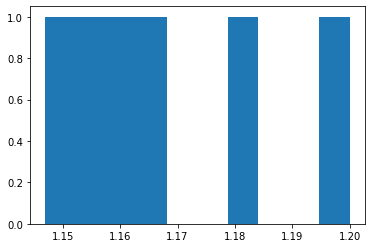

In [138]:
plt.hist(taux_par_ville['taux'])

### 6.2 Histogramme median des taux par genre

In [144]:
taux_par_genre = data_join.pivot_table(index='genre', values='taux', aggfunc='median')
taux_par_genre.reset_index()

,genre,taux
0,F,1.1615
1,M,1.1730


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.1615 , 1.16265, 1.1638 , 1.16495, 1.1661 , 1.16725, 1.1684 ,
        1.16955, 1.1707 , 1.17185, 1.173  ]),
 <BarContainer object of 10 artists>)

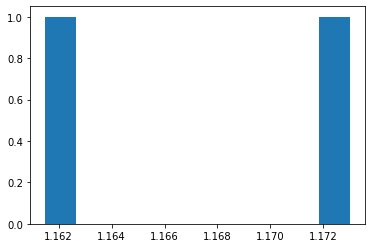

In [145]:
plt.hist(taux_par_genre['taux'])

### 6.3 Histogramme median des taux par genre et type

In [33]:
taux_par_genre_type = data_join.groupby(['genre', 'type'])['taux'].median()
taux_par_genre_type = taux_par_genre_type.reset_index()
taux_par_genre_type

,genre,type,taux
0,F,automobile,3.2190
1,F,immobilier,1.1495
2,M,automobile,3.4305
3,M,immobilier,1.1625


(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([1.1495, 1.3776, 1.6057, 1.8338, 2.0619, 2.29  , 2.5181, 2.7462,
        2.9743, 3.2024, 3.4305]),
 <BarContainer object of 10 artists>)

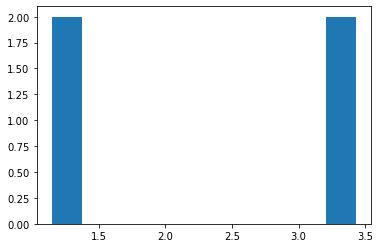

In [36]:
plt.hist(taux_par_genre_type['taux'])

### 6.4 Histogramme median des taux par genre et ville

In [37]:
taux_par_genre_ville = data_join.groupby(['genre', 'ville'])['taux'].median()
taux_par_genre_ville = taux_par_genre_ville.reset_index()
taux_par_genre_ville

,genre,ville,taux
0,F,BORDEAUX,1.1660
1,F,LYON,1.1610
2,F,MARSEILLE,1.1710
3,F,NICE,1.1070
4,F,PARIS,1.1500
5,F,TOULOUSE,1.2000
6,M,BORDEAUX,1.1910
7,M,LYON,1.1480
8,M,MARSEILLE,1.1550
9,M,NICE,1.1880


(array([1., 0., 0., 0., 2., 2., 2., 1., 1., 3.]),
 array([1.107 , 1.1163, 1.1256, 1.1349, 1.1442, 1.1535, 1.1628, 1.1721,
        1.1814, 1.1907, 1.2   ]),
 <BarContainer object of 10 artists>)

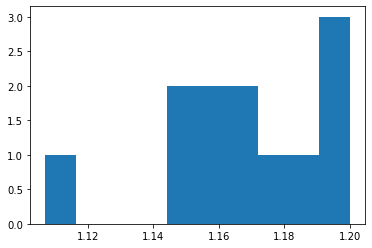

In [38]:
plt.hist(taux_par_genre_ville['taux'])

## 7- boxplot des revenus par ville

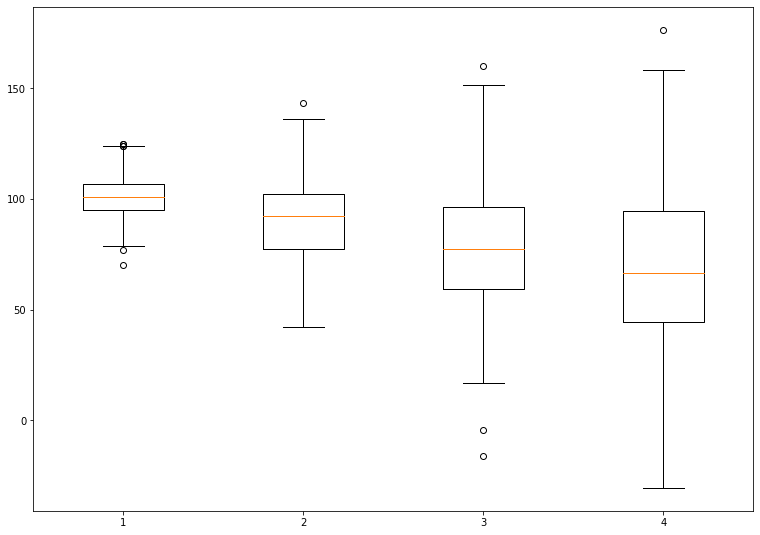

In [212]:
# Creating dataset
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

### boxplot des revenus par ville

In [217]:
revenu_par_ville = prets.pivot_table(index='ville', values='revenu', aggfunc='sum')
revenu_par_ville = revenu_par_ville.reset_index() 
revenu_par_ville

,ville,revenu
0,BORDEAUX,50816.0
1,LYON,95354.0
2,MARSEILLE,145926.0
3,NICE,85288.0
4,PARIS,335459.0
5,TOULOUSE,75617.0


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

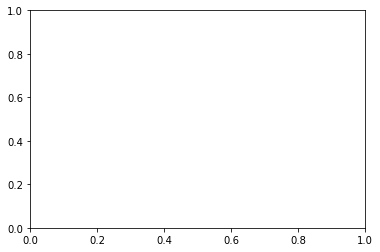

In [218]:
plt.boxplot(revenu_par_ville)

## 8- Table qui contient les clients et leurs emails avec les revenus supérieurs au revenu median

In [226]:
data_join.loc[((data_join['genre'] == 'M') & (data_join['revenu'] > 2942.0)) | ((data_join['genre'] == 'F') & (data_join['revenu'] > 2790.5)) , ['nom', 'email', 'revenu']]

,nom,email,revenu
0,Laurent Dagenais,LaurentDagenais@rhyta.com,3669.0
1,Guy Marois,GuyMarois@fleckens.hu,5310.0
2,Guy Marois,GuyMarois@fleckens.hu,5310.0
8,Agramant Pepin,AgramantPepin@dayrep.com,5486.0
9,Aiglentina Lambert,AiglentinaLambert@fleckens.hu,3578.0
...,...,...,...
236,Josette Bordeleau,JosetteBordeleau@einrot.com,4477.0
237,Langley Caron,LangleyCaron@armyspy.com,3878.0
239,Apolline Michaud,ApollineMichaud@superrito.com,5118.0
240,Apolline Michaud,ApollineMichaud@superrito.com,5118.0


 ## 9- Code postal (CP) où on passe moins de temps 

In [41]:
duree_CP = prets.pivot_table(index='CP', values='duree', aggfunc='mean')
duree_CP = duree_CP.reset_index()
duree_CP.head()

,CP,duree
0,6000,232.888889
1,6100,180.000000
2,6200,240.000000
3,6300,196.000000
4,13001,240.000000


In [42]:
duree_CP['duree'] = duree_CP['duree'].apply(lambda x : round(x,2))
duree_CP.head()


,CP,duree
0,6000,232.89
1,6100,180.00
2,6200,240.00
3,6300,196.00
4,13001,240.00


In [44]:
duree_CP_asc = duree_CP.sort_values('duree', ascending=True)
duree_CP_asc.head()

,CP,duree
33,69004,143.00
48,75010,147.50
6,13003,160.00
20,31000,163.33
18,13015,167.14


In [49]:
print("Code postal (CP) où on passe moins de temps: ", duree_CP_asc.iloc[0,0])

Code postal (CP) où on passe moin de temps:  69004


 ## 10- Les 5 premiers CP avec le plus haut taux 

In [278]:
taux_CP = prets.pivot_table(index='CP', values='taux', aggfunc='mean')
taux_CP = duree_CP.reset_index()
taux_CP = taux_CP.sort_values('taux', ascending=False)
taux_CP.head()

,index,CP,taux
33,33,69004,2.148000
48,48,75010,2.017000
20,20,31000,1.828833
46,46,75008,1.740500
35,35,69006,1.710500


## 11- Les 5 premiers CP avec le plus haut revenu

In [280]:
revenu_CP = prets.pivot_table(index='CP', values='revenu', aggfunc='mean')
revenu_CP = revenu_CP.reset_index()
revenu_CP = revenu_CP.sort_values('revenu', ascending=False)
revenu_CP.head()

,CP,revenu
44,75006,6784.000000
50,75012,5384.857143
55,75017,5244.250000
57,75019,4938.800000
40,75002,4911.333333


## Application: Chiffre d'affaire réalisé par agence
- importation du fichier
- Selection cumulée regroupée par ville du bénéfice
- Tracé de l'histogramme du chiffre d'affaire réalisé par agence

In [51]:
prets_exo = pd.read_csv('prets_enrichi.csv')
prets_exo.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


In [52]:
df_ville = prets_exo.groupby('ville')['benefices'].sum()
df_ville = df_ville.reset_index()
df_ville

,ville,benefices
0,BORDEAUX,1681.32
1,LYON,3014.80
2,MARSEILLE,4395.91
3,NICE,2682.75
4,PARIS,10016.35
5,TOULOUSE,2138.07


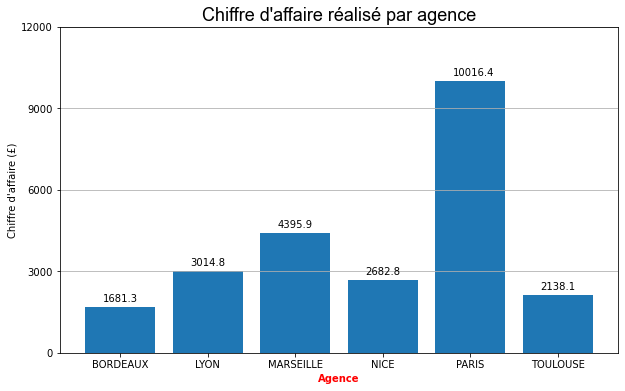

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(height= df_ville['benefices'], x=df_ville['ville'])
plt.title("Chiffre d'affaire réalisé par agence", fontname='Arial', fontsize=18)
plt.xlabel('Agence', color='red', fontweight='bold' )
plt.ylabel("Chiffre d'affaire (£)")
plt.grid(axis='y')
plt.ylim(0, 12000)
plt.yticks([0, 3000, 6000, 9000, 12000])

ca = df_ville['benefices'].tolist()
for i in range(6):
    plt.text(i-0.2, ca[i]+200, round(ca[i], 1))

plt.show()